In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# spherical coordinates distributions

# spherical shell distribution:
def spherical_shell(R, n):
    coordinates = np.zeros((3, n))
    for i in range(n):
        r = R + rd.uniform(-.1 * R, .1 * R)
        theta = rd.uniform(0., np.pi)
        phi = rd.uniform(0., 2 * np.pi)
        coordinates[:, i] = np.array([r, theta, phi])
    return coordinates

# solid sphere distribution
def solid_sphere(R, n):
    coordinates = np.zeros((3, n))
    for i in range(n):
        r = rd.uniform(0., R)
        theta = rd.uniform(0., np.pi)
        phi = rd.uniform(0., 2 * np.pi)
        coordinates[:, i] = np.array([r, theta, phi])
    return coordinates    

In [4]:
# converts spherical distributions to cartesian
def spherical_to_cartesian(spherical_coordinates):
    n = np.size(spherical_coordinates, 1)
    cartesian = np.zeros((3, n))
    for i in range(n):
        x = spherical_coordinates[0, i] * np.sin(spherical_coordinates[1, i]) * np.cos(spherical_coordinates[2, i])
        y = spherical_coordinates[0, i] * np.sin(spherical_coordinates[1, i]) * np.sin(spherical_coordinates[2, i])
        z = spherical_coordinates[0, i] * np.cos(spherical_coordinates[1, i])
        cartesian[:, i] = np.array([x, y, z])
    return cartesian

In [15]:
def shell(R, n):
    points_on_a_sphere = spherical_to_cartesian(spherical_shell(R, n))
    x_sphere = points_on_a_sphere[0, :]
    y_sphere = points_on_a_sphere[1, :]
    z_sphere = points_on_a_sphere[2, :]

    sphere_template = 'Initial_Setup/shell_distribution_{i}_particles.txt'
    np.savetxt(sphere_template.format(i=n), points_on_a_sphere)
    
    vel_template = 'Initial_Setup/stationary_{i}_particles.txt'
    velocities = np.zeros((3, n))
    np.savetxt(vel_template.format(i=n), velocities)
    
    plt.figure(figsize=(10,10))
    plt.scatter(x_sphere, y_sphere, 1, z_sphere)
    
def sphere(R, n):
    points_on_a_sphere = spherical_to_cartesian(solid_sphere(R, n))
    x_sphere = points_on_a_sphere[0, :]
    y_sphere = points_on_a_sphere[1, :]
    z_sphere = points_on_a_sphere[2, :]

    sphere_template = 'Initial_Setup/sphere_distribution_{i}_particles.txt'
    np.savetxt(sphere_template.format(i=n), points_on_a_sphere)
    
    vel_template = 'Initial_Setup/stationary_{i}_particles.txt'
    velocities = np.zeros((3, n))
    np.savetxt(vel_template.format(i=n), velocities)
    
    plt.figure(figsize=(10,10))
    plt.scatter(x_sphere, y_sphere, 8)
    plt.title('Spherical Initial Distribution', fontsize=20)
    plt.xlabel('x/pc', fontsize=20)
    plt.ylabel('y/pc', fontsize=20)
    plt.xlim((-30, 30))
    plt.ylim((-30, 30))
    plt.savefig('sphericalinitialdistribution.png')

In [9]:
# solar system initial conditions in cgs (sun is planet 0)
planet_positions = np.array([0, 57.9, 108.2, 149.6, 227.9, 778.6, 1433.5, 2872.5, 4495.1]) * 1e11
planet_velocities = np.array([0, 47.4, 35.0, 29.8, 24.1, 13.1, 9.7, 6.8, 5.4]) * 1e5
planet_masses = np.array([1.988e6, 0.33, 4.87, 5.97, 0.642, 1898, 568, 86.8, 102]) * 1e27

In [10]:
np.savetxt('solarsystem_masses.txt', planet_masses)

solarsystem_velocities = np.array([np.zeros(9), planet_velocities, np.zeros(9)])
np.savetxt('solarsystem_velocities.txt', solarsystem_velocities)

solarsystem_positions = np.array([planet_positions, np.zeros(9), np.zeros(9)])
np.savetxt('solarsystem_positions.txt', solarsystem_positions)

In [7]:
# homogeneous masses cloud of total mass M
def homogen(M, n):
    masses = np.ones(n) * (M / n)
    masses_template = 'Initial_Setup/masses_{i}_particles.txt'
    np.savetxt(masses_template.format(i=n), masses)

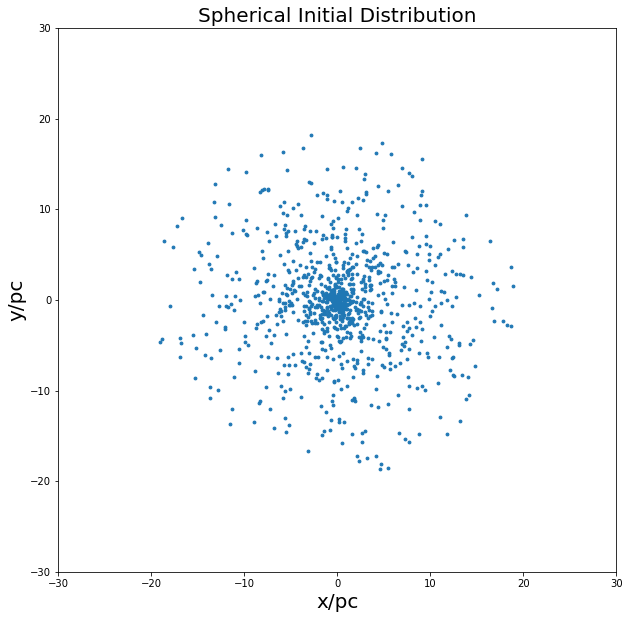

In [16]:
homogen(1e6, 1000)
sphere(20, 1000)

In [5]:
masses = np.loadtxt('Initial_Setup/masses.txt')
T = 1000
n = 1000
t = .1
time = np.linspace(0, T-1, T) * t

def absolute(v):
    return np.sqrt(v[0]**2 + v[1]**2 + v[2]**2)

def speeds():
    speed = np.zeros((n, T))
    for i in range(T):
        speed_components = np.loadtxt('Velocities/k{i}velocities.txt'.format(i=i))
        for j in range(n):
            speed[j, i] = absolute(speed_components[:, j])
    return speed

def average(array, T):
    av = np.zeros(T)
    for i in range(T):
        av[i] = np.average(array[:, i])
    return av

In [ ]:
average_speed = average(speeds(), T)

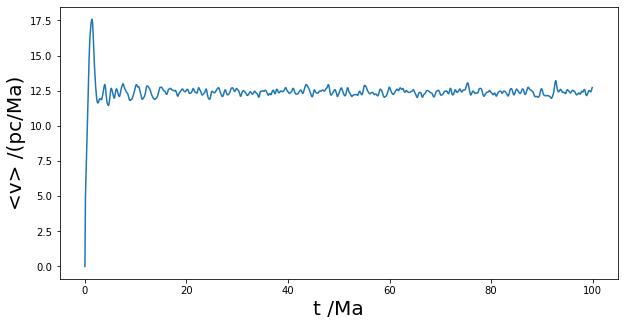

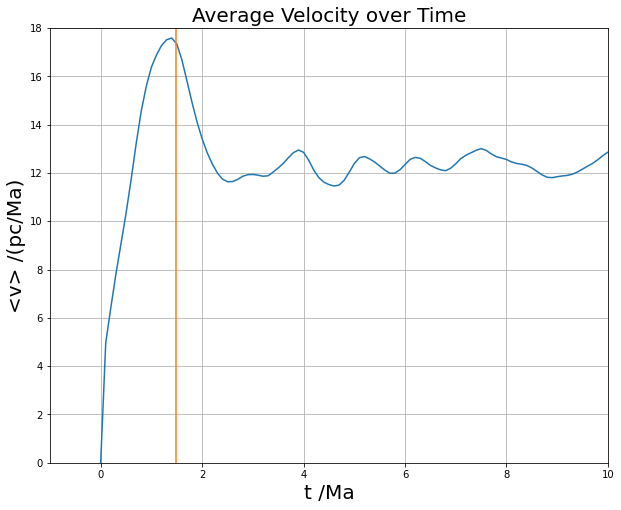

In [21]:
t_ff = np.ones(10) * 1.482
velo = np.linspace(-5, 20, 10)

plt.figure(figsize=(10,5))
plt.plot(time, average_speed)
plt.xlabel('t /Ma', fontsize=20)
plt.ylabel('<v> /(pc/Ma)', fontsize=20)
plt.savefig('averageVfulltime.png')

plt.figure(figsize=(10,8))
plt.plot(time, average_speed)
plt.plot(t_ff, velo)
plt.title('Average Velocity over Time', fontsize=20)
plt.xlabel('t /Ma', fontsize=20)
plt.ylabel('<v> /(pc/Ma)', fontsize=20)
plt.xlim(-1, 10)
plt.ylim(0, 18)
plt.grid()
plt.savefig('averageVfirst10Ma.png')

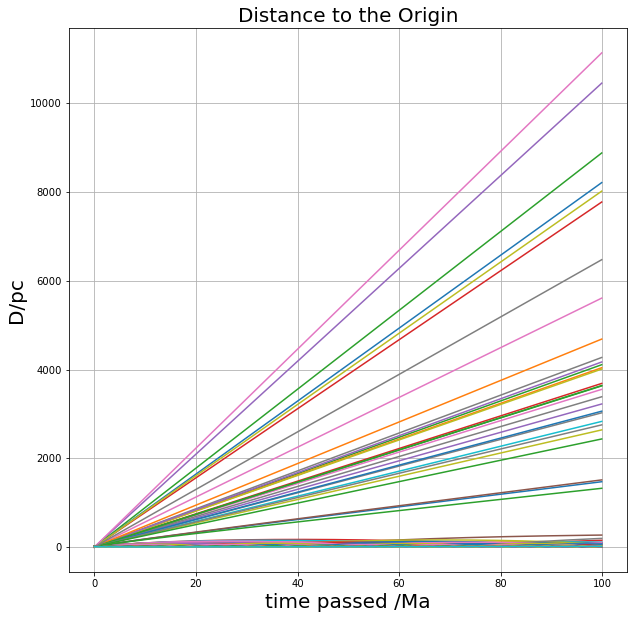

In [19]:
radiuses = np.loadtxt('radiuses.txt')
plt.figure(figsize=(10,10))

#names = np.array(['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'])

#label_template = 'Object {i}'
for i in range(n):
    plt.plot(time, radiuses[i, :])
    
plt.title('Distance to the Origin', fontsize=20)
plt.xlabel('time passed /Ma', fontsize=20)
plt.ylabel('D/pc', fontsize=20)
#plt.legend()
plt.grid()
plt.savefig('distancesofeverycluster.png')